# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s


# week6 Boston housing

# Read the boston housing dataset and perform the follwing operations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv("C:/Users/Karthik/Python AIML Programs/Boston.csv")

In [5]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

# a) Handle missing values and autliars .

In [7]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [8]:
df.shape

(506, 15)

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


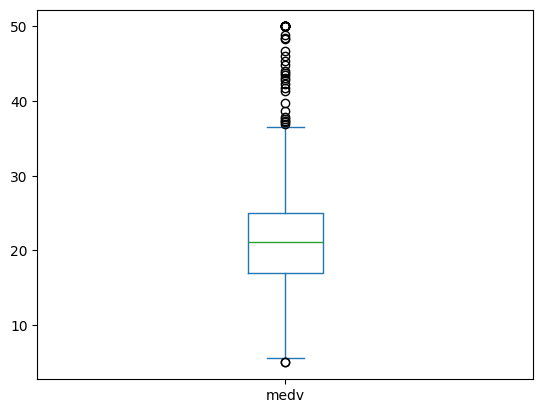

In [11]:
df['medv'].plot(kind='box')
plt.show()

In [12]:
Q1 = df['medv'].quantile(0.25)
Q3 = df['medv'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['medv'] >= lower_bound) & (df['medv'] <= upper_bound)]


In [13]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# b) Perform univarate and byvariate analyays.

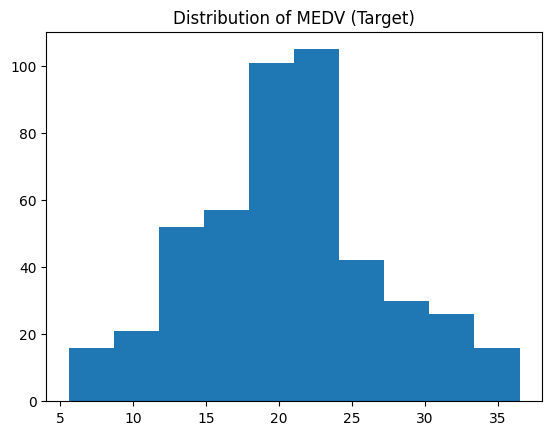

In [14]:
plt.hist(df['medv'])
plt.title("Distribution of MEDV (Target)")
plt.show()


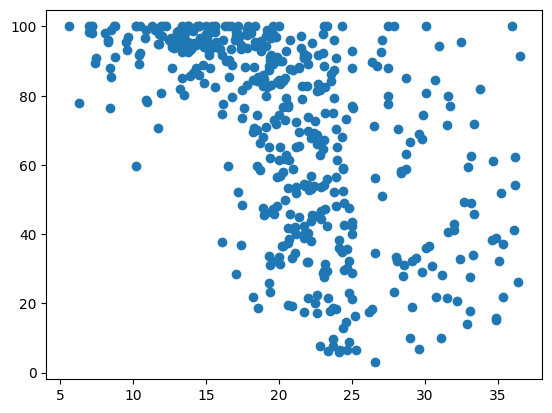

In [15]:
plt.scatter(df['medv'],df['age'])

# c) Split the data into training and testing 75:25 ratio. 

In [16]:
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# d) Train the model using lenear regrassion and evaluate its performance.

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [23]:
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 9.579732494207539
